# ELRF Residuals

In [2]:
import chainladder as cl
import pandas as pd

This example replicates the diagnostic residuals from Barnett and Zehnwirth's
"Best Estimates for Reserves" paper in which they describe the Extended Link
Ratio Family (ELRF) model.  This `Development` estimator is based on the ELRF
model.

The weighted standardized residuals are contained in the ``std_residuals_``
property of the fitted estimator.  Using these, we can replicate Figure 2.6
from the paper.


In [6]:
raa = cl.load_sample('raa')
model = cl.Development().fit(raa)

plot1a = model.std_residuals_.T
plot1b = model.std_residuals_.mean('origin').T
plot2a = model.std_residuals_
plot2b = model.std_residuals_.mean('development')
plot3a = model.std_residuals_.dev_to_val().T
plot3b = model.std_residuals_.dev_to_val().mean('origin').T
plot4 = pd.concat((
    (raa[raa.valuation < raa.valuation_date] * 
     model.ldf_.values).unstack().rename('Fitted Values'),
    model.std_residuals_.unstack().rename('Residual')), axis=1).dropna()

c:\users\jboga\documents\github\chainladder-python\chainladder\core\pandas.py:314: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)


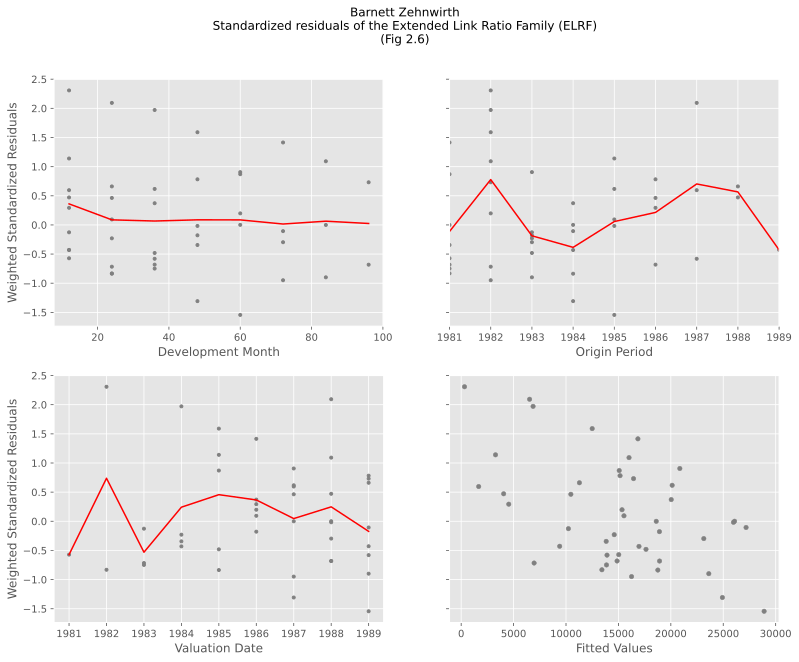

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(13,10))
fig.suptitle("Barnett Zehnwirth\nStandardized residuals of the Extended Link Ratio Family (ELRF)\n(Fig 2.6)");


plot1a.plot(
    style='.', color='gray', legend=False, ax=ax00,
    xlabel='Development Month', ylabel='Weighted Standardized Residuals')
plot1b.plot(
    color='red', legend=False, ax=ax00)
plot2a.plot(
    style='.', color='gray', legend=False, ax=ax01, xlabel='Origin Period')
plot2b.plot(
    color='red', legend=False, ax=ax01)
plot3a.plot(
    style='.', color='gray', legend=False, ax=ax10,
    xlabel='Valuation Date', ylabel='Weighted Standardized Residuals')
plot3b.plot(color='red', legend=False, grid=True, ax=ax10)
plot4.plot(kind='scatter', marker='o', color='gray', 
           x='Fitted Values', y='Residual', ax=ax11, sharey=True);


In [ ]:
from myst_nb import glue
glue("plot_elrf_resid", fig, display=False)